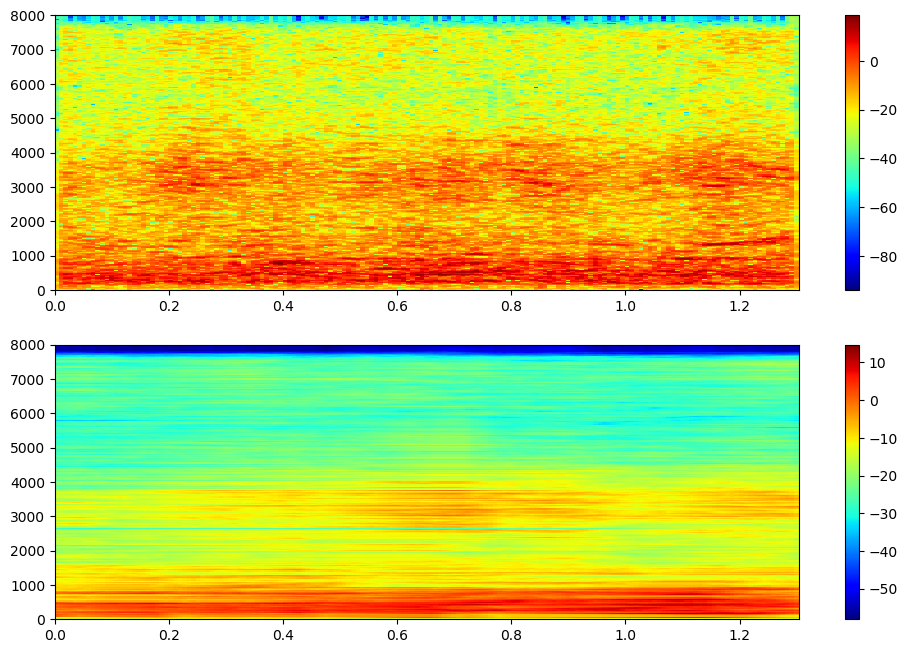

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from audlib.sig.transform import stpowspec
from audlib.enhance import mmse_henriks
from audlib.sig.window import hamming
from audlib.quickstart import welcome, babble
from audlib.sig.util import add_noise
from audlib.plot import specgram

# Make noisy signal
sig, sr = welcome()
noise, sr = babble()
noise = noise[:len(sig)]
noisy = add_noise(sig, noise, snr=5)

# Define short-time analysis parameters
window_length = 0.032  # in seconds
hop = 0.25
wsize = int(window_length * sr)
wind = hamming(wsize, hop=hop, synth=True)
nfft = 512

# Analysis
npsd = stpowspec(noise, sr, wind, hop, nfft, synth=True)
sig_hat, npsd_hat = mmse_henriks(noisy, sr, wind, hop, nfft, alpha=.98, beta=.8, noise=None)

# Plot
fig = plt.figure(figsize=(12, 8), dpi=100)
ax = fig.add_subplot(311)
specgram(10*np.log10(npsd), ax, time_axis=np.arange(npsd.shape[0])*(window_length*hop),
                                freq_axis=np.linspace(0, sr/2, num=npsd.shape[1]))
ax = fig.add_subplot(312)
specgram(10*np.log10(npsd_hat), ax, time_axis=np.arange(npsd.shape[0])*(window_length*hop),
                                    freq_axis=np.linspace(0, sr/2, num=npsd.shape[1]))
ax = fig.add_subplot(313)
specgram(10*np.log10(npsd_hat), ax, time_axis=np.arange(npsd.shape[0])*(window_length*hop),
                                    freq_axis=np.linspace(0, sr/2, num=npsd.shape[1]))

In [2]:
import IPython.display as ipd
ipd.Audio(noisy, rate=sr)  # Load noisy

In [3]:
ipd.Audio(sig_hat, rate=sr)  # Load enhanced